# Cycle Counts in Dublin City Centre (2023)

In this project, I examine a dataset published by Dublin City Council detailing the number of cyclists measured by totem counters at several locations in Dublin city centre (https://data.smartdublin.ie/dataset/dublin-city-centre-cycle-counts). Passing cyclists are counted and logged every hour, 24 hours per day, 7 days per week.

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [451]:
df = pd.read_csv("cycle-counts-1-jan-31-december-2023.csv")

In [453]:
df.head()

,Time,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,...,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,North Strand Rd S/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
0,01/01/2023 00:00,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,2.0,...,6.0,6.0,0.0,NaN,2.0,0.0,2.0,8.0,0.0,8.0
1,01/01/2023 01:00,0.0,0.0,0.0,6.0,4.0,2.0,2.0,2.0,0.0,...,9.0,4.0,0.0,NaN,0.0,0.0,0.0,6.0,0.0,6.0
2,01/01/2023 02:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,4.0,5.0,0.0,NaN,3.0,0.0,3.0,9.0,0.0,9.0
3,01/01/2023 03:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,5.0,0.0,NaN,4.0,1.0,3.0,8.0,0.0,8.0
4,01/01/2023 04:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,13.0,4.0,0.0,NaN,4.0,0.0,4.0,4.0,0.0,4.0


There are columns relating to 11 distinct locations in the city. The column names are very long - let's abbreviate them for simplicity.

In [455]:
df = df.rename(columns={
    'Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)': 'Charleville Mall',
    'Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist': 'Charleville Mall North',
    'Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist': 'Charleville Mall South',
    'Clontarf - James Larkin Rd Cyclist West': 'Clontarf - James Larkin Rd West',
    'Clontarf - James Larkin Rd Cyclist East': 'Clontarf - James Larkin Rd East',
    'Clontarf - Pebble Beach Carpark Cyclist West': 'Clontarf - Pebble Beach Carpark West',
    'Clontarf - Pebble Beach Carpark Cyclist East': 'Clontarf - Pebble Beach Carpark East',
    'Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist': 'Drumcondra Inbound',
    'Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist West': 'Drumcondra Inbound West',
    'Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist East': 'Drumcondra Inbound East',
    'Drumcondra Cyclists Outbound (Not On Site - Roadworks)': 'Drumcondra Outbound',
    'Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist East': 'Drumcondra Outbound East',
    'Drumcondra Cyclists Outbound (Not On Site - Roadworks) Cyclist West': 'Drumcondra Outbound West',
    'Griffith Avenue (Clare Rd Side) Cyclist South': 'Griffith Avenue (Clare Rd Side) South',
    'Griffith Avenue (Clare Rd Side) Cyclist North': 'Griffith Avenue (Clare Rd Side) North',
    'Griffith Avenue (Lane Side) Cyclist South': 'Griffith Avenue (Lane Side) South',
    'Griffith Avenue (Lane Side) Cyclist North': 'Griffith Avenue (Lane Side) North',  
    'Grove Road Totem': 'Grove Road',
    'Grove Road Totem OUT': 'Grove Road Outbound',
    'Grove Road Totem IN': 'Grove Road Inbound',
    'North Strand Rd N/B (Counter Removed for Roadworks) Cyclist': 'North Strand Rd Northbound',
    'North Strand Rd S/B (Counter Removed for Roadworks) Cyclist': 'North Strand Rd Southbound',
    'Richmond Street Inbound Cyclist South': 'Richmond Street Inbound South',
    'Richmond Street Inbound Cyclist North': 'Richmond Street Inbound North',
    'Richmond Street Outbound Cyclist North': 'Richmond Street Outbound North',
    'Richmond Street Outbound Cyclist South': 'Richmond Street Outbound South'
})

Next, we will visualise where the missing data occurs.

There is no data for North Strand Southbound. The data is incomplete for Charleville Mall and Drumcondra Cyclists Inbound. There is a small gap in the data for Clontarf - Pebble Beach Carpark.

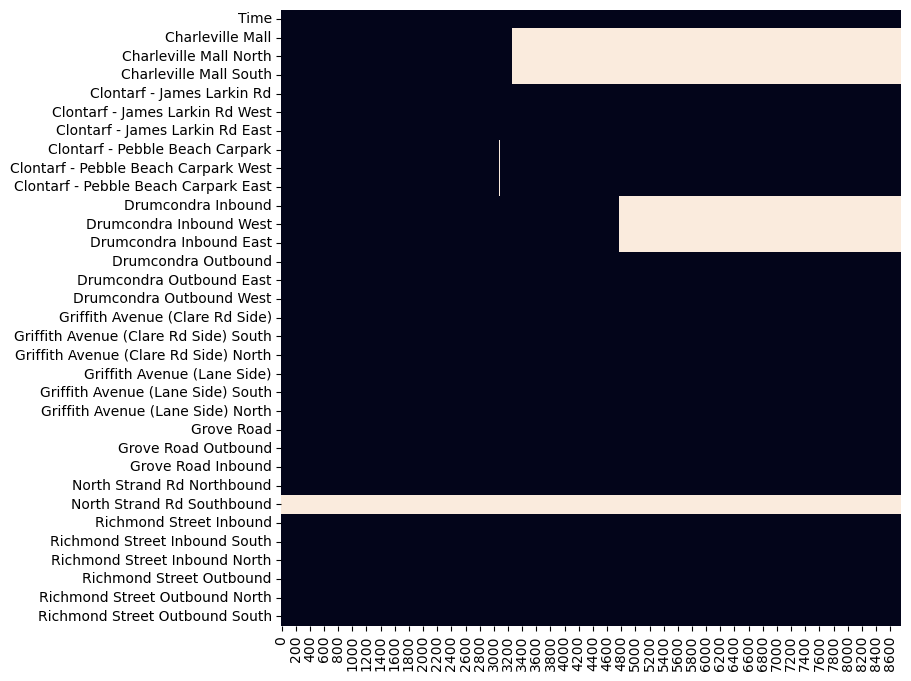

In [459]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull().T, cbar=False)
plt.xticks(rotation=90)
plt.show()

In [461]:
# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y %H:%M')

# Extract useful time-based features
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df['day'] = df['Time'].dt.day
df['day_of_week'] = df['Time'].dt.dayofweek  # 0=Monday, 6=Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['hour'] = df['Time'].dt.hour

In [463]:
df_short = df[['Time', 'hour', 'day', 'month', 'day_of_week', 'is_weekend', 'Charleville Mall', 'Clontarf - James Larkin Rd',
               'Clontarf - Pebble Beach Carpark', 'Drumcondra Inbound', 'Drumcondra Outbound', 'Griffith Avenue (Clare Rd Side)',
               'Griffith Avenue (Lane Side)', 'Grove Road', 'North Strand Rd Northbound', 'Richmond Street Inbound', 'Richmond Street Outbound']]

In [465]:
df_short.head()

,Time,hour,day,month,day_of_week,is_weekend,Charleville Mall,Clontarf - James Larkin Rd,Clontarf - Pebble Beach Carpark,Drumcondra Inbound,Drumcondra Outbound,Griffith Avenue (Clare Rd Side),Griffith Avenue (Lane Side),Grove Road,North Strand Rd Northbound,Richmond Street Inbound,Richmond Street Outbound
0,2023-01-01 00:00:00,0,1,1,6,1,1.0,1.0,5.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0,8.0
1,2023-01-01 01:00:00,1,1,1,6,1,0.0,6.0,2.0,0.0,0.0,3.0,0.0,13.0,0.0,0.0,6.0
2,2023-01-01 02:00:00,2,1,1,6,1,0.0,0.0,2.0,0.0,0.0,1.0,0.0,9.0,0.0,3.0,9.0
3,2023-01-01 03:00:00,3,1,1,6,1,1.0,1.0,0.0,1.0,0.0,3.0,0.0,12.0,0.0,4.0,8.0
4,2023-01-01 04:00:00,4,1,1,6,1,0.0,0.0,1.0,1.0,0.0,2.0,0.0,17.0,0.0,4.0,4.0


In [467]:
df_short.describe()

,Time,hour,day,month,day_of_week,is_weekend,Charleville Mall,Clontarf - James Larkin Rd,Clontarf - Pebble Beach Carpark,Drumcondra Inbound,Drumcondra Outbound,Griffith Avenue (Clare Rd Side),Griffith Avenue (Lane Side),Grove Road,North Strand Rd Northbound,Richmond Street Inbound,Richmond Street Outbound
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,3263.00000,8759.000000,8745.000000,4766.000000,8759.0,8759.000000,8759.000000,8759.000000,8759.0,8759.000000,8759.000000
mean,2023-07-02 11:30:00.410959104,11.500114,15.720548,6.526027,3.008219,0.287671,12.29574,36.288275,51.263007,9.422577,0.0,11.364083,3.798721,110.456102,0.0,52.205503,45.493435
min,2023-01-01 00:00:00,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2023-04-02 05:45:00,5.750000,8.000000,4.000000,1.000000,0.000000,2.00000,3.000000,5.000000,1.000000,0.0,2.000000,0.000000,27.000000,0.0,11.000000,11.000000
50%,2023-07-02 11:30:00,11.500000,16.000000,7.000000,3.000000,0.000000,7.00000,23.000000,33.000000,5.000000,0.0,8.000000,0.000000,82.000000,0.0,51.000000,36.000000
75%,2023-10-01 17:15:00,17.250000,23.000000,10.000000,5.000000,1.000000,15.00000,56.000000,78.000000,11.000000,0.0,16.000000,4.000000,130.000000,0.0,78.000000,63.000000
max,2023-12-31 23:00:00,23.000000,31.000000,12.000000,6.000000,1.000000,159.00000,301.000000,413.000000,142.000000,0.0,76.000000,149.000000,802.000000,0.0,278.000000,309.000000
std,NaN,6.922417,8.796749,3.448048,2.003519,0.452703,17.25253,40.601238,57.365567,14.943510,0.0,12.191973,9.876042,122.013489,0.0,44.149151,44.498050


The columns `"Drumcondra Outbound"` and `"North Strand Rd Northbound"` contain no tallys, and so are dropped.

In [469]:
df_short = df_short.drop(columns=['Drumcondra Outbound', 'North Strand Rd Northbound'])

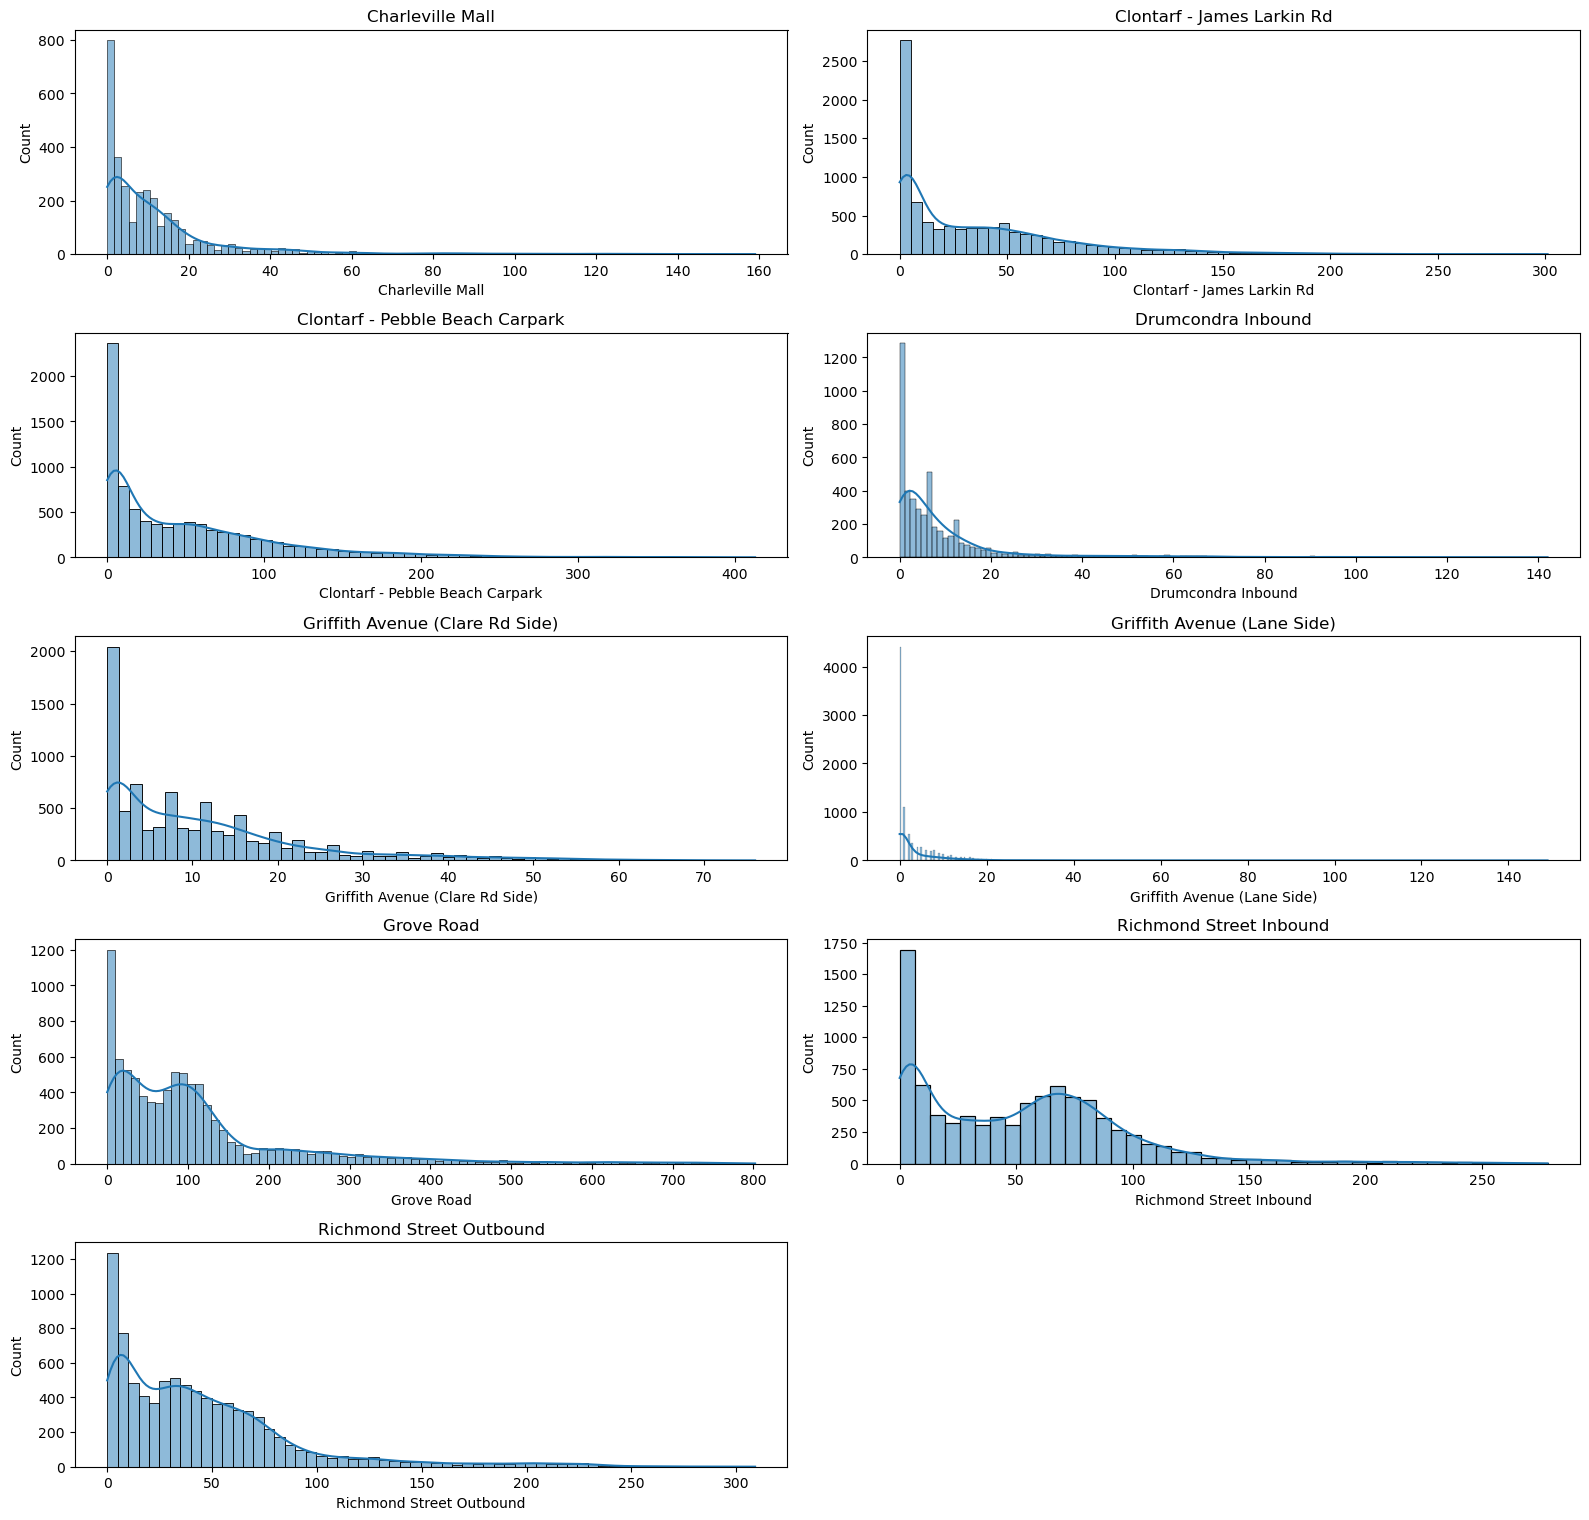

In [473]:
locations = df_short.columns[6:] # Select the tally columns

plt.figure(figsize=(16, len(locations) * 3)) # Prepare figure size

for idx, loc in enumerate(locations, 1):
    plt.subplot(len(locations), 2, idx)
    sns.histplot(df_short[loc], kde=True)
    plt.title(loc)

plt.tight_layout()
plt.show()

Next, we will visualise the daily counts at each location using heatmaps.

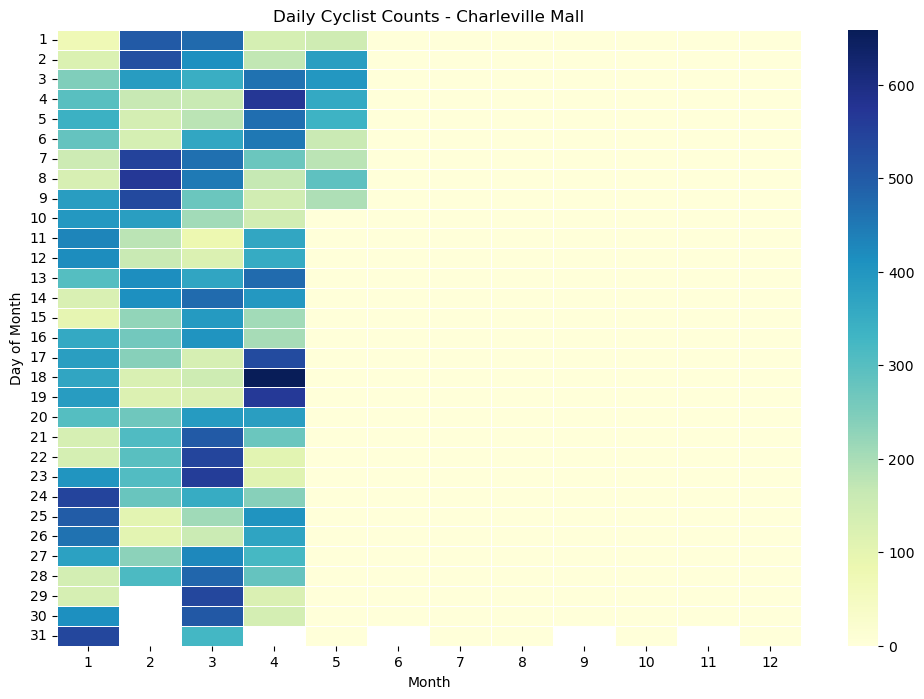

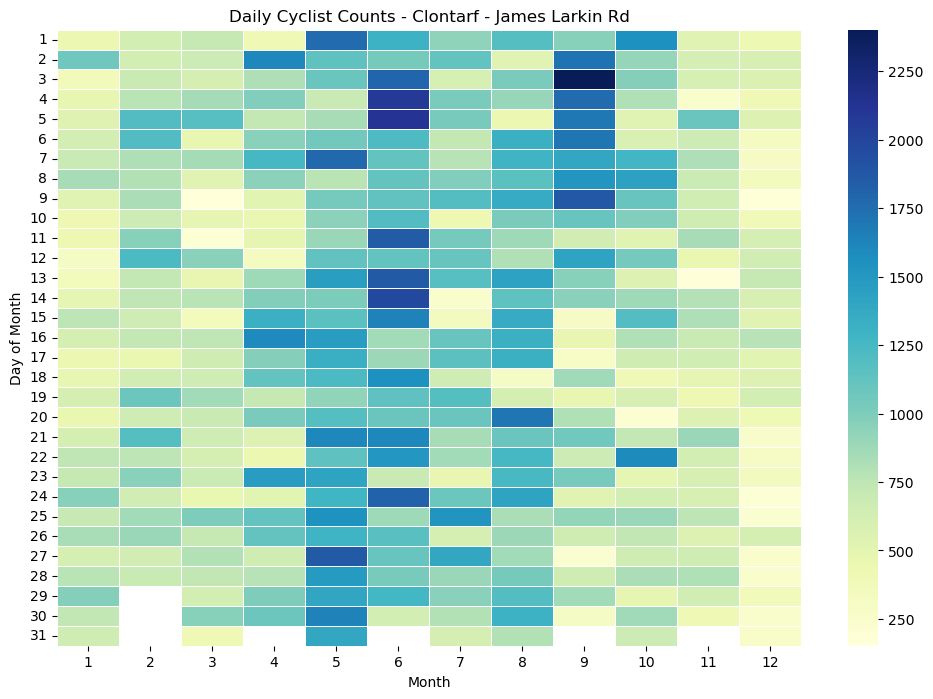

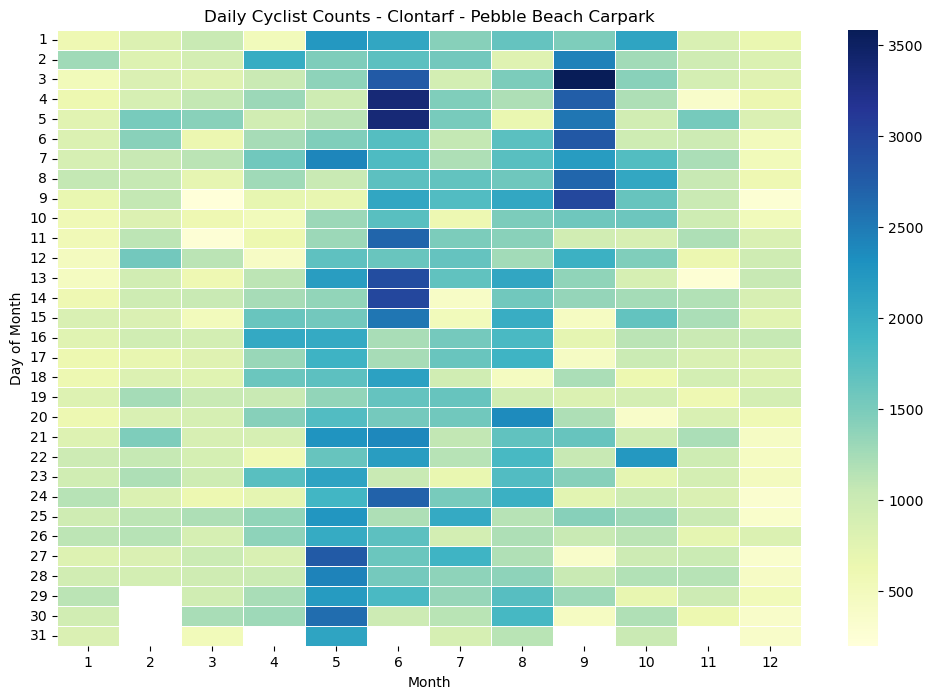

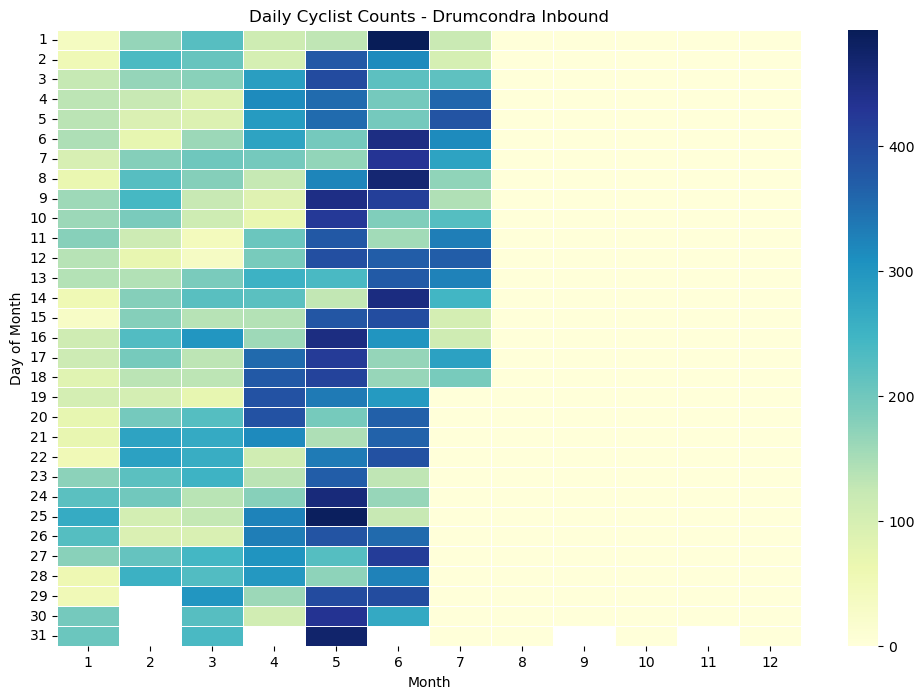

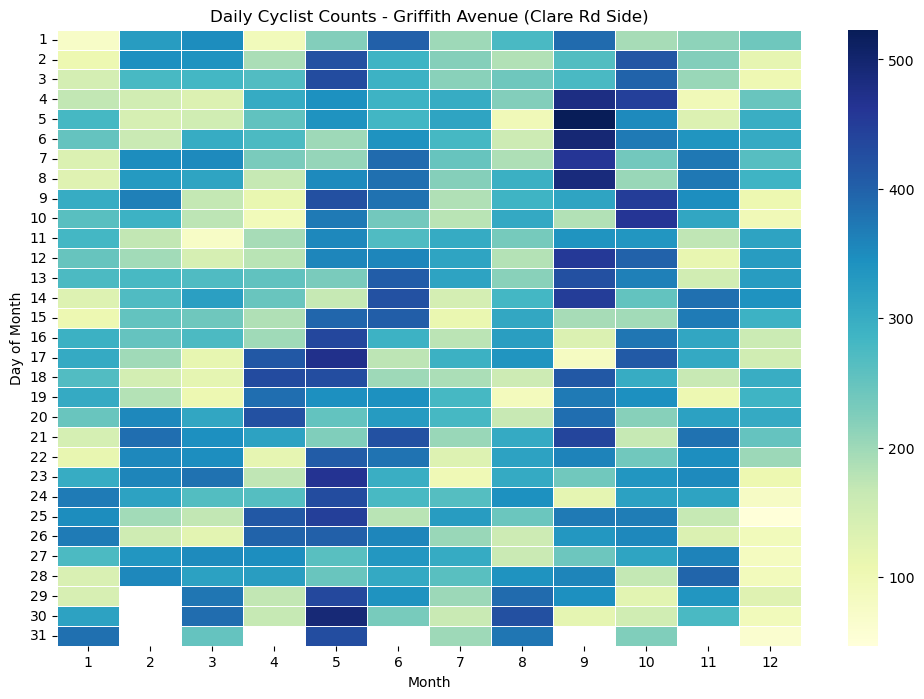

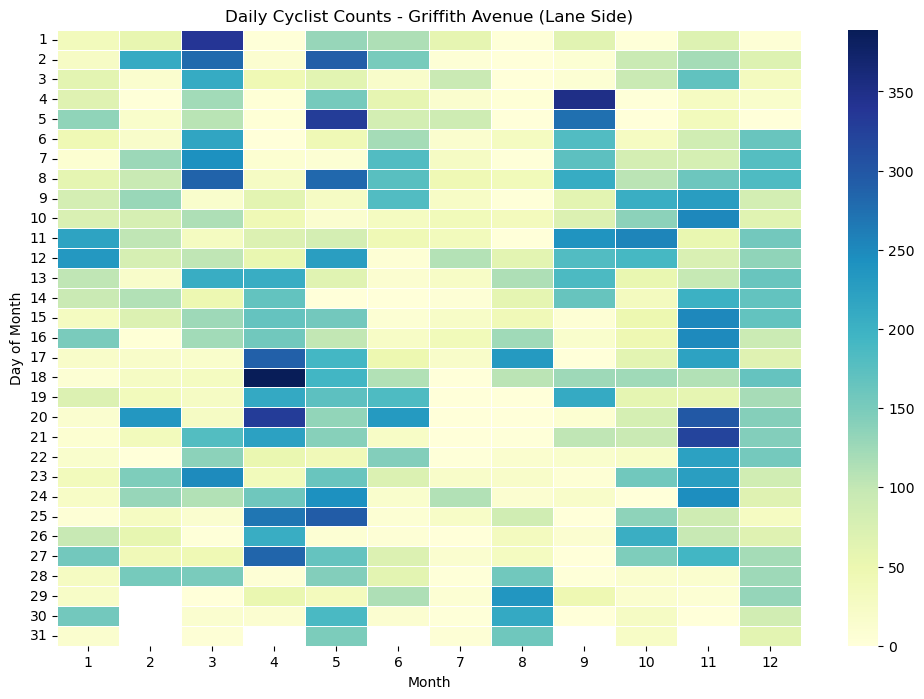

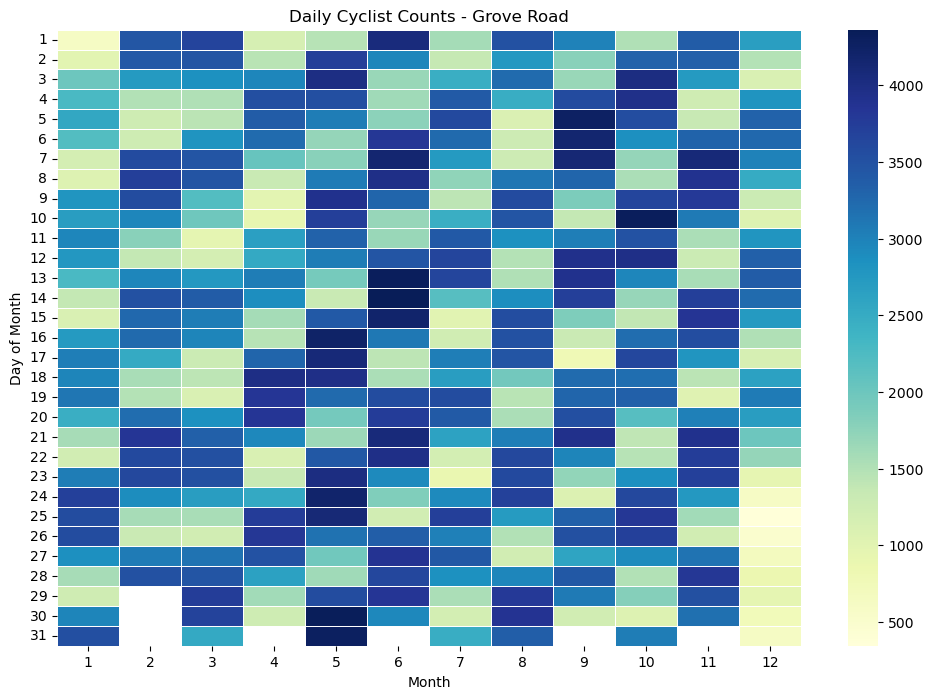

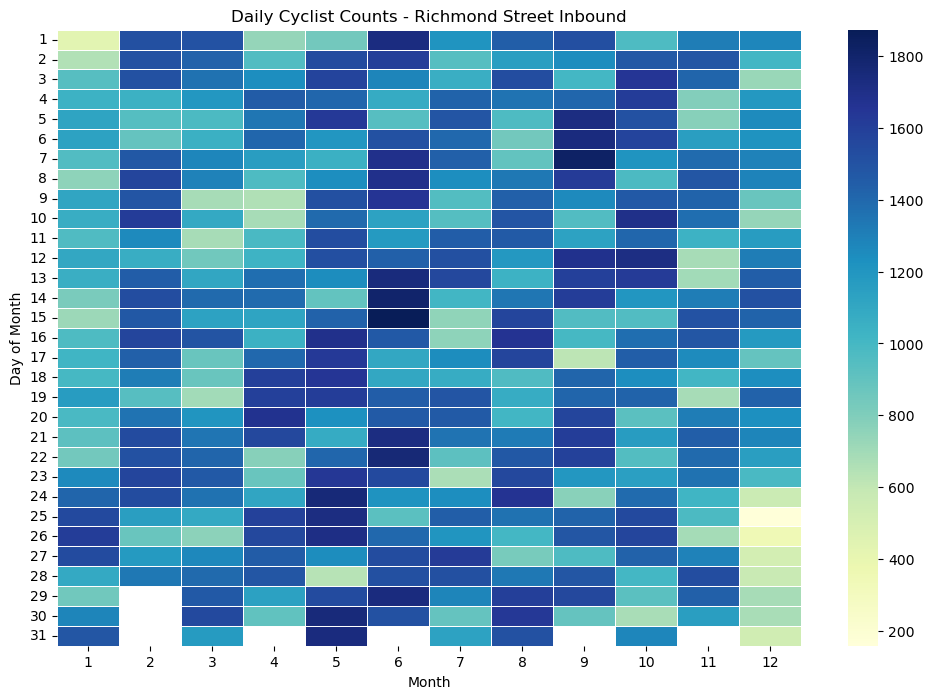

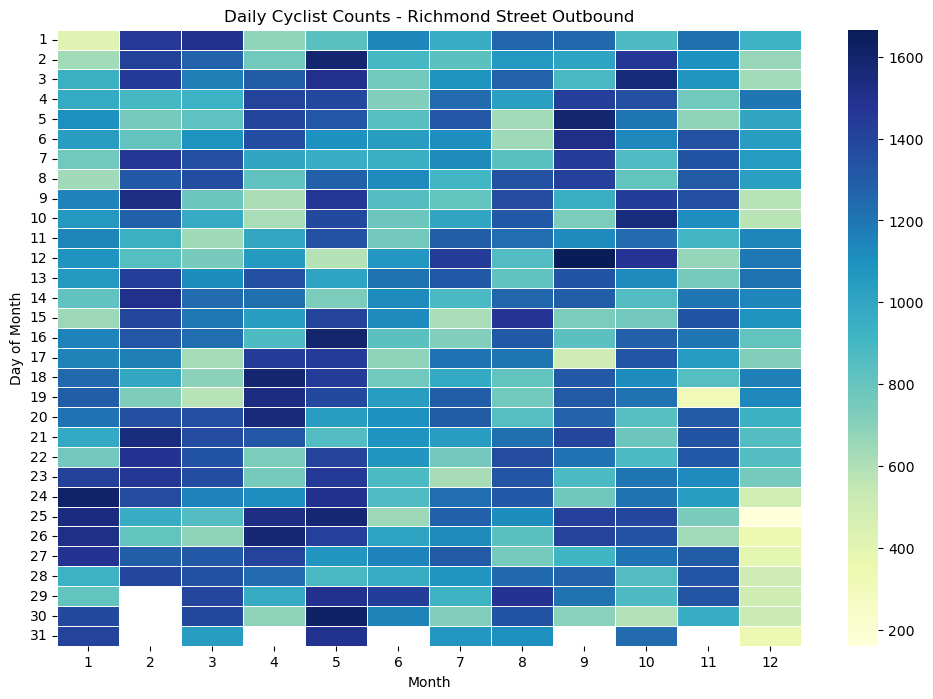

In [475]:
for idx, loc in enumerate(locations, 1):
    daily_data = df_short.groupby(df_short["Time"].dt.date)[loc].sum().reset_index()
    daily_data.columns = ["Date", "Daily Count"]
    daily_data["Date"] = pd.to_datetime(daily_data["Date"])

    daily_data["Month"] = daily_data["Date"].dt.month
    daily_data["Day"] = daily_data["Date"].dt.day

    heatmap_data = daily_data.pivot(index="Day", columns="Month", values="Daily Count")

    plt.figure(figsize=(12,8))
    sns.heatmap(
        heatmap_data,
        cmap="YlGnBu",
        annot=False,
        fmt=".0f",
        cbar=True,
        linewidths=0.5
        )

    plt.title(f"Daily Cyclist Counts - {loc}")
    plt.xlabel("Month")
    plt.ylabel("Day of Month")
    plt.yticks(rotation=0)
    plt.show()

The heatmaps reveal distinct differences in usage patterns of the different cycle lanes. Commuter patterns dominate in some locations, e.g. **Grove Road**, with the largest numbers recorded on Tuesdays, Wednesdays and Thursdays, intermediate numbers on Mondays and Fridays, and the lowest numbers at the weekends. This pattern is less apparent in the heatmaps of the **Clontarf James Larkin Rd** and **Pebble Beach Carpark** locations, suggesting these routes are not used as much by commuters. The cyclist numbers at these locations are much greater in the warmer summer months. This seasonality is also seen in commuter locations, such as **Grove Road**, superimposed on the commuter pattern.

## Grove Road

Let's take a closer look at **Grove Road**, a southside location near the inner city with a distinct commuter usage pattern. The plots below display the mean hourly cyclist tallys, which again show expected commuter patterns with peaks at 8-9am and 5-6pm. By separating the inbound and outbound data we can see that the majority of cyclists travel towards the city centre for work, but a notable minority also travel in the opposite direction.

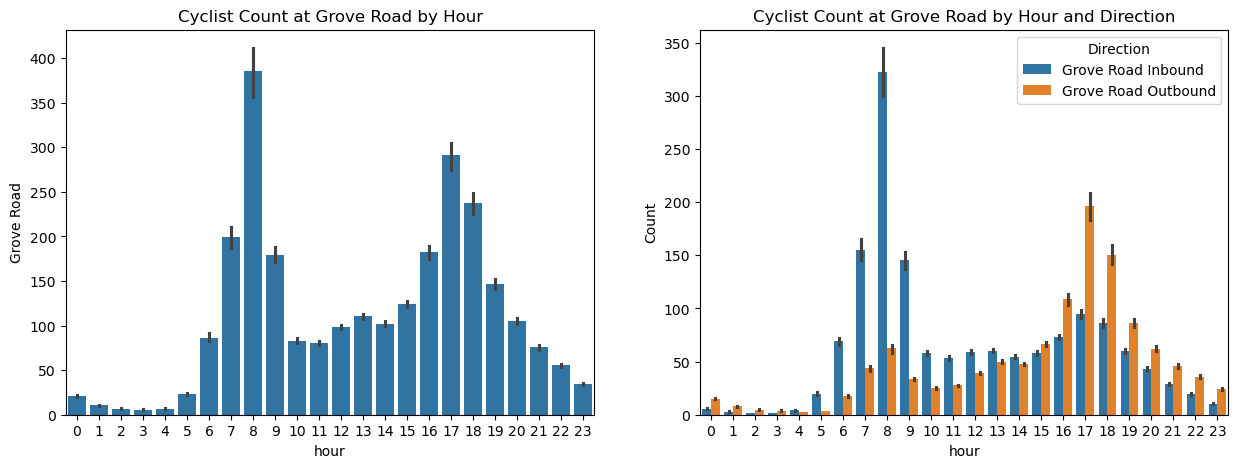

In [239]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.barplot(x="hour", y="Grove Road", data=df)
plt.title("Cyclist Count at Grove Road by Hour")

# Transform the Grove Road data from wide format to long format using the 'melt' function
grove_road = df.melt(id_vars='hour', # Retain the 'hour' column as an identifier
                       value_vars=['Grove Road Inbound', 'Grove Road Outbound'], # Columns to reshape into rows
                       var_name='Direction', # New column to store the names of the melted columns
                       value_name='Count') # New column to store the values from the melted columns

plt.subplot(122)
sns.barplot(x='hour', y='Count', hue='Direction', data=grove_road)
plt.title("Cyclist Count at Grove Road by Hour and Direction")

plt.show()

## Weather Data

Let's check for a relationship between weather conditions and cyclist tallys. A dataset containing hourly data from a weather station in Phoenix Park was downloaded from the website of Met Éireann (https://www.met.ie/climate/available-data/historical-data). 

In [348]:
weather = pd.read_csv("hly175.csv", skiprows=15, low_memory=False)

weather.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,16/08/2003 01:00,0,0,0,9.2,0,8.9,8.5,11.1,95,1021.9
1,16/08/2003 02:00,0,0,0,9,0,8.7,8.5,11.1,96,1021.7
2,16/08/2003 03:00,0,0,0,8.2,0,8,7.7,10.5,96,1021.2
3,16/08/2003 04:00,0,0,0,8.4,0,8.1,7.9,10.7,97,1021.2
4,16/08/2003 05:00,0,0,0,7.7,0,7.5,7.3,10.2,97,1021.1


In [350]:
weather = weather.drop(weather.columns[[1, 3, 5, 7, 8, 10]], axis=1) # Drop unrequired columns

In [352]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185952 entries, 0 to 185951
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    185952 non-null  object
 1   rain    185952 non-null  object
 2   temp    185952 non-null  object
 3   wetb    185952 non-null  object
 4   rhum    185952 non-null  object
dtypes: object(5)
memory usage: 7.1+ MB


In [354]:
# Convert 'date' to datetime
weather['date'] = pd.to_datetime(weather['date'], format='%d/%m/%Y %H:%M')

In [356]:
# Convert rain, temp, wetb and rhum columns to numeric type

weather['rain'] = pd.to_numeric(weather['rain'], errors='coerce')
weather['temp'] = pd.to_numeric(weather['temp'], errors='coerce')
weather['wetb'] = pd.to_numeric(weather['wetb'], errors='coerce')
weather['rhum'] = pd.to_numeric(weather['rhum'], errors='coerce')

In [358]:
# Create a new dataframe containing only the 2023 weather data

weather2023 = weather[weather['date'].dt.year == 2023]

In [360]:
weather2023.head()

,date,rain,temp,wetb,rhum
169871,2023-01-01 00:00:00,0.3,6.8,6.2,91.0
169872,2023-01-01 01:00:00,0.0,6.2,5.3,86.0
169873,2023-01-01 02:00:00,0.0,4.5,3.9,91.0
169874,2023-01-01 03:00:00,0.1,4.0,3.6,93.0
169875,2023-01-01 04:00:00,0.0,2.5,2.3,96.0


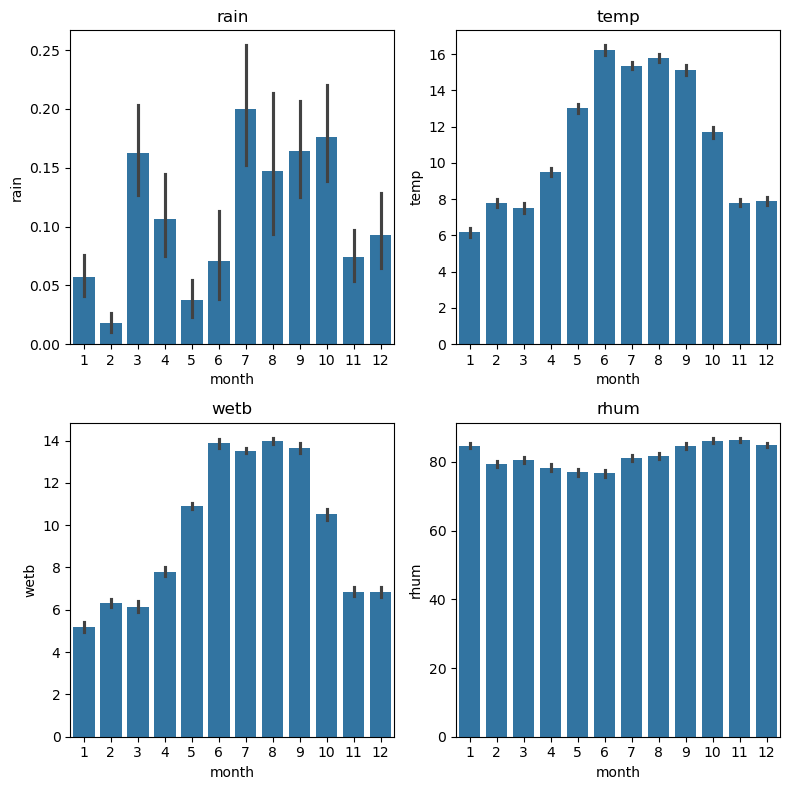

In [299]:
weather_columns = weather2023[['rain', 'temp', 'wetb', 'rhum']]

plt.figure(figsize=(8, 8))

for idx, col in enumerate(weather_columns, 1):
    plt.subplot(2, 2, idx)
    sns.barplot(x="month", y=col, data=weather2023)
    plt.title(col)

plt.tight_layout()
plt.show()

Let's check if there is a relationship between the daily number of cyclists at the Clontarf locations and the daily temperature high.

In [367]:
merged_data = pd.merge(df, weather2023, how="inner", left_on="Time", right_on="date")

In [369]:
merged_data.head()

,Time,Charleville Mall,Charleville Mall North,Charleville Mall South,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd West,Clontarf - James Larkin Rd East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark West,Clontarf - Pebble Beach Carpark East,...,month,day,day_of_week,is_weekend,hour,date,rain,temp,wetb,rhum
0,2023-01-01 00:00:00,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,2.0,...,1,1,6,1,0,2023-01-01 00:00:00,0.3,6.8,6.2,91.0
1,2023-01-01 01:00:00,0.0,0.0,0.0,6.0,4.0,2.0,2.0,2.0,0.0,...,1,1,6,1,1,2023-01-01 01:00:00,0.0,6.2,5.3,86.0
2,2023-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,1,1,6,1,2,2023-01-01 02:00:00,0.0,4.5,3.9,91.0
3,2023-01-01 03:00:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,6,1,3,2023-01-01 03:00:00,0.1,4.0,3.6,93.0
4,2023-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1,1,6,1,4,2023-01-01 04:00:00,0.0,2.5,2.3,96.0


In [417]:
daily_total_rain = merged_data.groupby(merged_data["Time"].dt.date)["rain"].sum().reset_index()
daily_max_temp = merged_data.groupby(merged_data["Time"].dt.date)["temp"].max().reset_index()

clontarf_larkin = merged_data.groupby(merged_data["Time"].dt.date)["Clontarf - James Larkin Rd"].sum().reset_index()
clontarf_beach = merged_data.groupby(merged_data["Time"].dt.date)["Clontarf - Pebble Beach Carpark"].sum().reset_index()

clontarf_daily_data = daily_total_rain.merge(daily_max_temp, on="Time").merge(clontarf_larkin, on="Time").merge(clontarf_beach, on="Time")

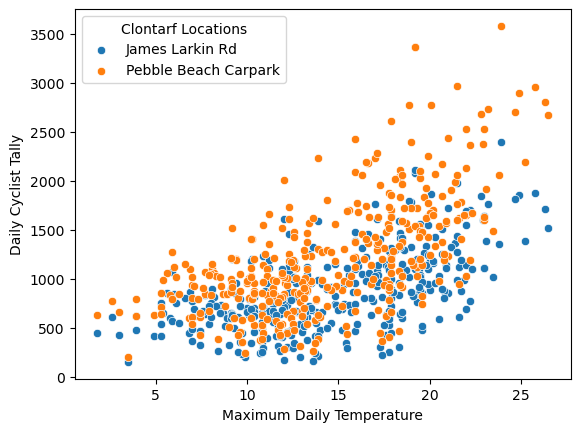

In [435]:
sns.scatterplot(y="Clontarf - James Larkin Rd", x="temp", data=clontarf_daily_data, label="James Larkin Rd")
sns.scatterplot(y="Clontarf - Pebble Beach Carpark", x="temp", data=clontarf_daily_data, label="Pebble Beach Carpark")
plt.legend(title="Clontarf Locations")
plt.ylabel("Daily Cyclist Tally")
plt.xlabel("Maximum Daily Temperature")

plt.show()

From this plot we can clearly see that the days with the most cyclists at both locations were among the warmest days of the year.